In [68]:
import ROOT

# Primeiro Histograma

<h3> 
TH1F <br />
H = histograma <br />
1 = 1 dimensão <br />
F = float  ; I = int
</H3>

In [69]:
hist = ROOT.TH1F('hist','Histograma',100,0,100)
hist.Fill(10)
hist.Fill(90)
hist.GetXaxis().SetTitle("Eixo X") # Eixo X
hist.GetYaxis().SetTitle("Eixo Y") # Eixo Y
c = ROOT.TCanvas("","",800,600)
hist.Draw()

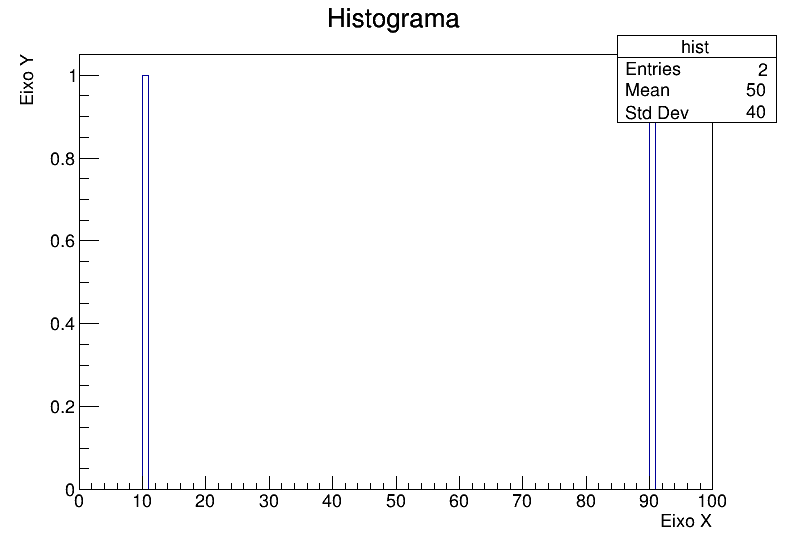

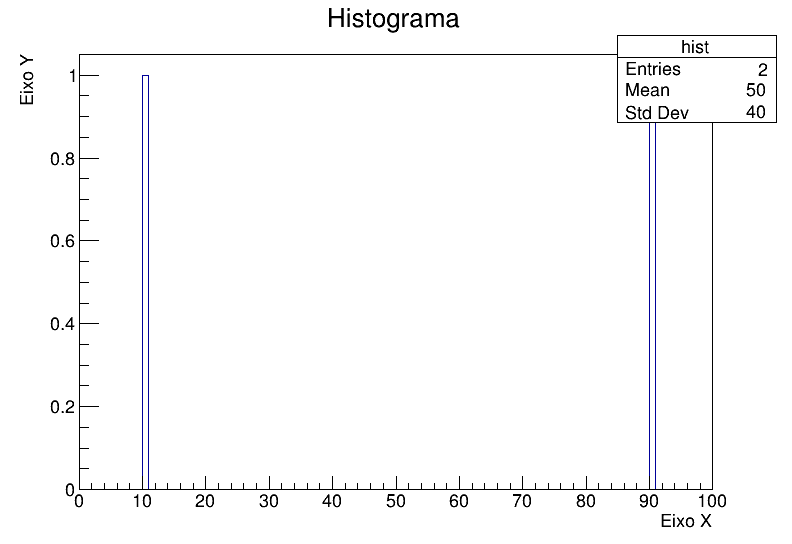

In [70]:
#%jsroot on 
#Gráfico interativo
c.Draw()


# Primeiro Gráfico

In [71]:
import array
x = array.array("d",[1,2,3,4,5])
y = array.array("d",[1,4,9,16,25])

grafico = ROOT.TGraph(5,x,y)


In [72]:
grafico.SetMarkerStyle(4) # estilo da marca
grafico.SetMarkerSize(1)

In [73]:
c = ROOT.TCanvas()
#grafico.Draw("AL*") # Coloca uma estrela
#grafico.Draw("ACP") # C deixa a curva mais suave
grafico.Draw("ALP") # Padrão

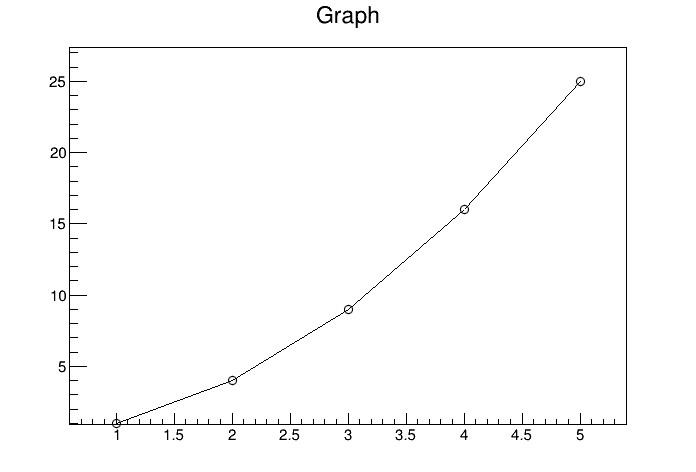

In [74]:
c.Draw()

# Lendo input e criando um histograma

## Lendo Dados

In [75]:
hist = ROOT.TH1F("hist","histograma",9,1,9)
hist.GetXaxis().SetTitle("Grade")
hist.GetYaxis().SetTitle("Entrada")

Warning in <TFile::Append>: Replacing existing TH1: hist (Potential memory leak).


In [76]:
with open(r'data/data1.txt', 'r') as arq:
    for line in arq:
        valor = float(line)
        hist.Fill(valor)

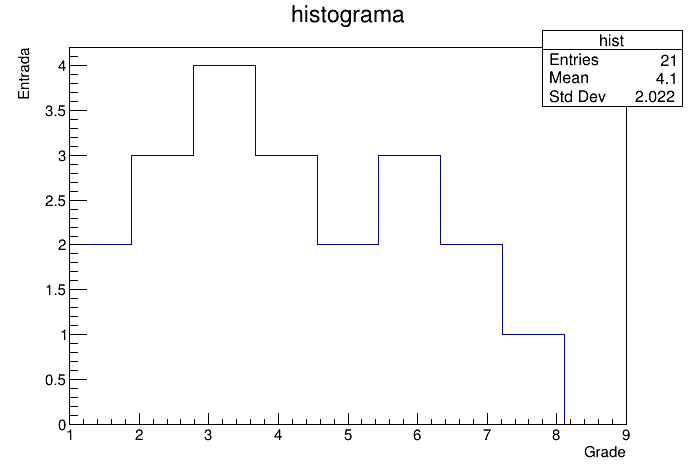

In [77]:
c= ROOT.TCanvas()
hist.Draw()
c.Draw()

# Plot dados em um gráfico

## Lendo os dados

In [78]:
import pandas as pd 

In [79]:
df = pd.read_csv("data/data2.txt",sep=';')
df.head()

,x,y
0,1,1
1,2,4
2,3,100
3,4,16
4,5,25


## colocando no gráfico

In [80]:
import array


x = array.array("d",df.x.array)
y = array.array("d",df.y.array)

grafico = ROOT.TGraph(len(x),x,y)
grafico.SetTitle("Grafico ; Valor x; Valor Y")


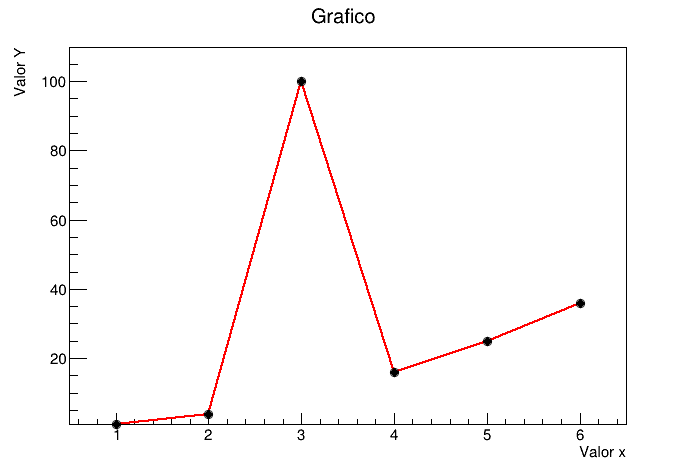

In [81]:
grafico.SetMarkerStyle(20) 
grafico.SetMarkerSize(1)
grafico.SetLineWidth(2)
grafico.SetLineColor(2)
c= ROOT.TCanvas()
grafico.Draw("ALP")
c.Draw()

# Criando números aleatórios

Warning in <TFile::Append>: Replacing existing TH1: hist (Potential memory leak).


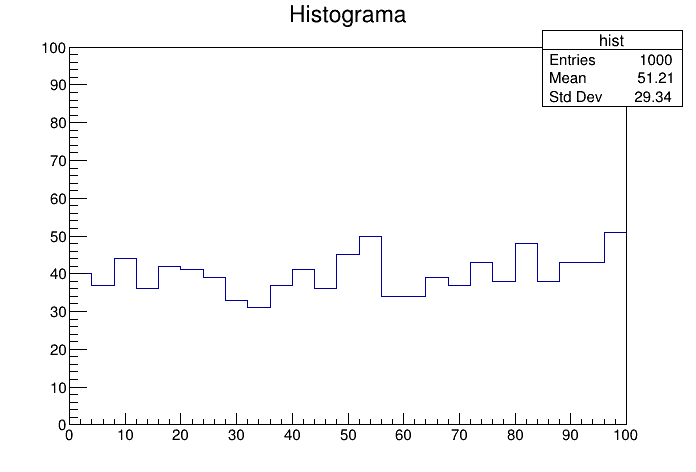

In [82]:
aleatorio = ROOT.TRandom2(1) # se 0 seed "aleatórias"
hist = ROOT.TH1F("hist","Histograma",25,0,100)
c = ROOT.TCanvas()
for i in range(1000):
    r = aleatorio.Rndm()*100 # Rndm uniformemente aleatório entre [0,1]
    hist.Fill(r)

hist.GetYaxis().SetRangeUser(0,100)
hist.Draw()
c.Draw()

# Gerando e ajustando uma distribuição gaussiana

## Criando os números aleatórios da guassiana

In [83]:
aleatorio = ROOT.TRandom2(3)
with open(r'data/data3.txt', 'w') as arq:
    for i in range(1000):
        r= aleatorio.Gaus(5,1)#Gauss(Valor médio,Desvio padrão)
        arq.write("%s\n" % r)
    print('OK')    

OK


## Gráfico

In [84]:
hist = ROOT.TH1F("hist","Histograma",100,0,10)
hist.GetXaxis().SetTitle("Distribuicao")
c = ROOT.TCanvas()


Warning in <TFile::Append>: Replacing existing TH1: hist (Potential memory leak).


In [85]:
with open(r'data/data3.txt', 'r') as arq:
    for line in arq:
        valor = float(line)
        hist.Fill(valor)

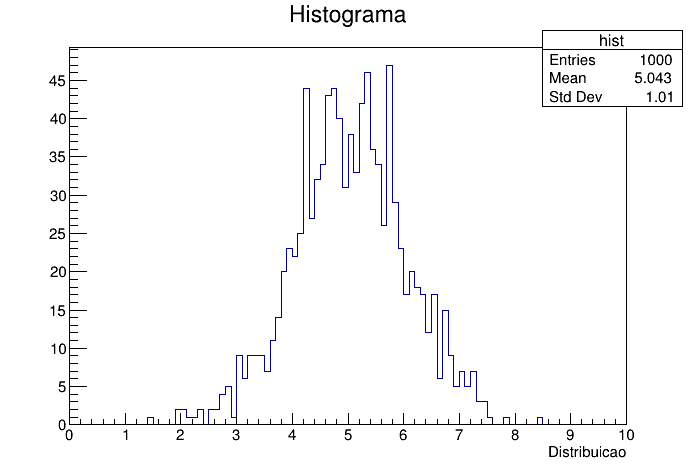

In [86]:

hist.Draw()
c.Draw()

## Ajustando o gráfico

In [87]:
hist.Fit('gaus') 

 FCN=58.2416 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=8.59282e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.89198e+01   1.63924e+00   4.76665e-03  -1.16830e-05
   2  Mean         5.07043e+00   3.25396e-02   1.21431e-04  -9.34939e-04
   3  Sigma        9.70538e-01   2.70371e-02   2.62874e-05   1.72034e-03


Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResu

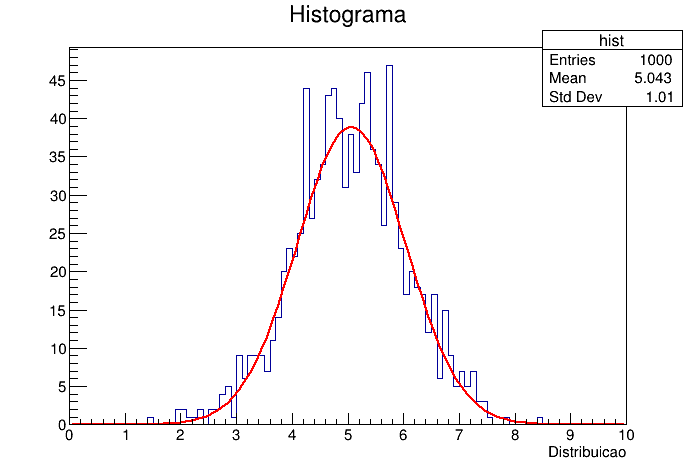

In [88]:
hist.Draw()
c.Draw()

# ajustando funções e parametros

In [89]:
%jsroot off

In [90]:
hist = ROOT.TH1F("hist","Histograma",100,0,10)
hist.GetXaxis().SetTitle("Distribuicao")

with open(r'data/data3.txt', 'r') as arq:
    for line in arq:
        valor = float(line)
        hist.Fill(valor)


Warning in <TFile::Append>: Replacing existing TH1: hist (Potential memory leak).


## Ajuste padrao

In [91]:
fit = ROOT.TF1('fit','gaus',0,10) #Ajuste,(nome,metodo,intervalo)

 FCN=58.2416 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=8.59169e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.89198e+01   1.63924e+00   4.76665e-03  -1.16780e-05
   2  Mean         5.07043e+00   3.25396e-02   1.21431e-04  -9.35508e-04
   3  Sigma        9.70538e-01   2.70371e-02   2.62874e-05   1.71855e-03


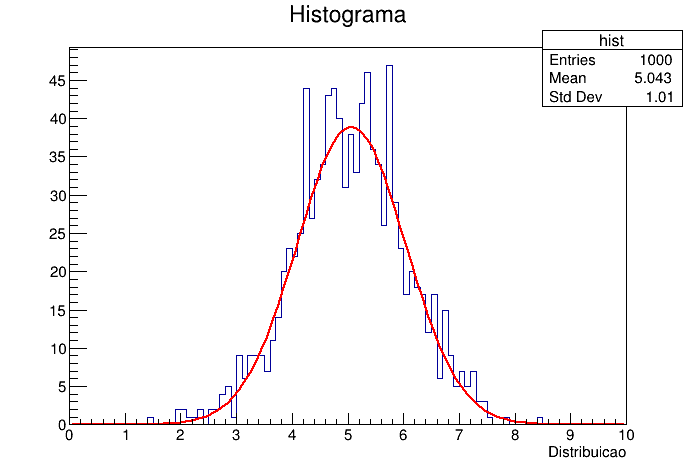

In [92]:
hist.Fit('fit') #Colocar o ajuste no grafico, com o metodo TF1
c = ROOT.TCanvas()
hist.Draw()
c.Draw()

## Ajuste com "limitacao"

 FCN=21.1653 FROM MIGRAD    STATUS=CONVERGED      81 CALLS          82 TOTAL
                     EDM=1.67191e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.92367e+01   2.12889e+00  -6.31589e-04  -2.65694e-05
   2  Mean         5.03423e+00   7.43892e-02  -1.83665e-04  -1.11854e-04
   3  Sigma        1.01818e+00   1.38747e-01  -6.06731e-05   4.26112e-04


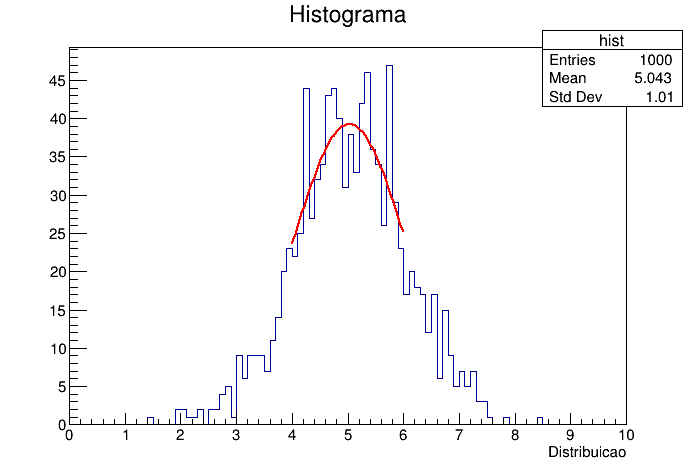

In [93]:
fit = ROOT.TF1('fit','gaus',4,6) 
hist.Fit('fit','R')  # R ajuste fica apenas no intervalo mencionado 
c = ROOT.TCanvas()
hist.Draw()
c.Draw()

## Ajuste com parametros

 FCN=58.2416 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=8.59169e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.89198e+01   1.63924e+00   4.76665e-03  -1.16780e-05
   2  Mean         5.07043e+00   3.25396e-02   1.21431e-04  -9.35508e-04
   3  Sigma        9.70538e-01   2.70371e-02   2.62874e-05   1.71855e-03


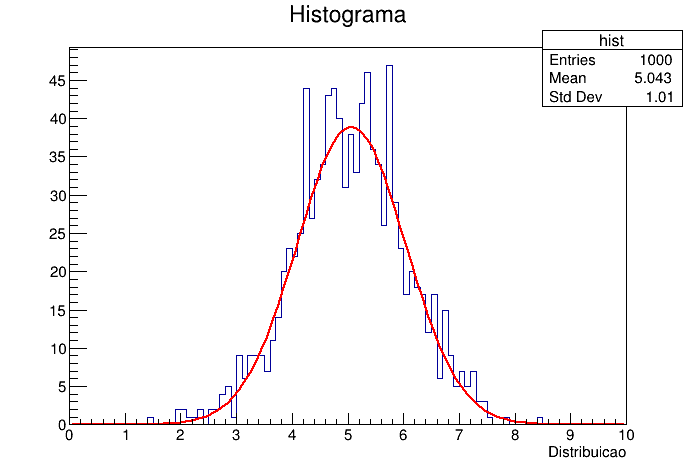

In [94]:
fit = ROOT.TF1('fit','gaus',0,10) 
fit.SetParameter(0,40) #Bin maxima no hist
fit.SetParameter(1,5) # media
fit.SetParameter(2,1) # Desvio padrao
hist.Fit('fit','R')  
c = ROOT.TCanvas()
hist.Draw()
c.Draw()

## Pegando os valores do ajuste

In [95]:
media = fit.GetParameter(1) 
sigma = fit.GetParameter(2)

media/sigma


5.224352044779325

# Adicionando Legendas 

 FCN=58.2416 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=8.59169e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.89198e+01   1.63924e+00   4.76665e-03  -1.16780e-05
   2  Mean         5.07043e+00   3.25396e-02   1.21431e-04  -9.35508e-04
   3  Sigma        9.70538e-01   2.70371e-02   2.62874e-05   1.71855e-03


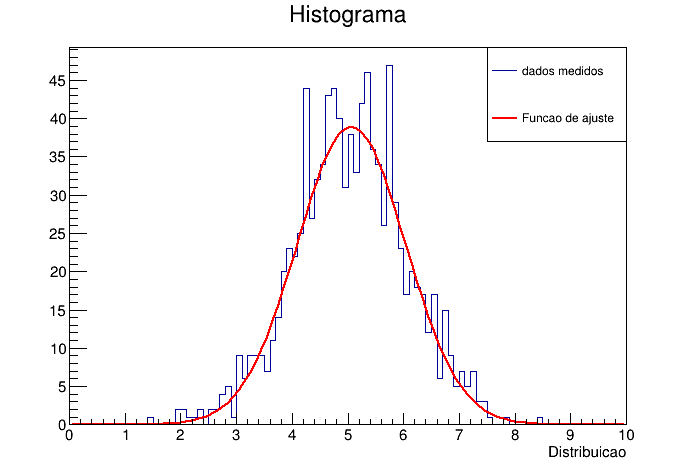

In [96]:
legenda = ROOT.TLegend(0.7,0.7,0.9,0.9) # (largura x, largura y, posicao x, posicao y)
fit = ROOT.TF1('fit','gaus',0,10) 
fit.SetParameter(0,40)
fit.SetParameter(1,5) 
fit.SetParameter(2,1) 
hist.Fit('fit','R')  
c = ROOT.TCanvas()
hist.SetStats(0) # Remove o box com as estatisticas
hist.Draw()

c.Draw()
legenda.AddEntry(hist,"dados medidos",'l')# (obj,Nome, tipo de "Risco" l = linha; p = ponto)
legenda.AddEntry(fit,'Funcao de ajuste','l')
legenda.Draw()


# Deixando o grafico mais bonito

### Criandp Histograma

In [97]:
hist = ROOT.TH1F("hist","Histograma",100,0,15)
hist.GetXaxis().SetTitle("Distribuicao")
hist.GetYaxis().SetTitle("Medida")
hist.SetStats(0)
hist.GetXaxis().SetTitleSize(0.05) # Tamanho Eixo X
hist.GetYaxis().SetTitleSize(0.05)
hist.SetFillColor(ROOT.kGreen-8) #Mudar cor - para intensidade


Warning in <TFile::Append>: Replacing existing TH1: hist (Potential memory leak).


### Adicionando os dados

In [98]:
with open(r'data/data3.txt', 'r') as arq:
    for line in arq:
        valor = float(line)
        hist.Fill(valor)

### Criando o fit

In [99]:
fit = ROOT.TF1('fit','gaus',0,15) 
fit.SetParameter(0,40)
fit.SetParameter(1,5) 
fit.SetParameter(2,1)
fit.SetLineWidth(3) # Tamanho da linha 
fit.SetLineStyle(2)
fit.SetFillColor(ROOT.kBlue)
hist.Fit('fit','R')  

 FCN=36.6875 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=7.35667e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.88257e+01   2.39837e+00   5.68148e-03  -7.79102e-06
   2  Mean         5.05647e+00   3.22013e-02   9.63397e-05   5.41386e-04
   3  Sigma        9.83278e-01   2.52863e-02   2.00018e-05   2.17056e-03


Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResu

### Criando o Canvas

In [100]:
c = ROOT.TCanvas()
c.SetTickx() 
c.SetTicky()
c.SetGridx()
c.SetGridy()

### Criando a legenda

In [101]:
legenda = ROOT.TLegend(0.5,0.6,0.8,0.8) 
legenda.AddEntry(hist,"dados medidos",'f')
legenda.AddEntry(fit,'Funcao de ajuste','l')
legenda.SetBorderSize(0) # Removendo a borda da legenda

### Plotando o grafico

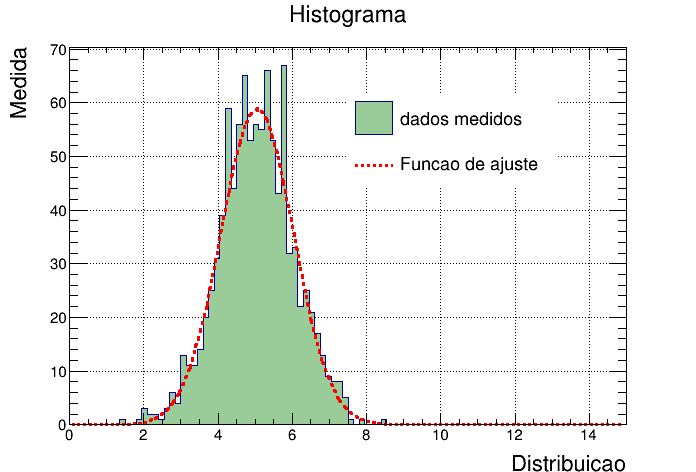

In [102]:
hist.Draw()
c.Draw()
legenda.Draw()


# Plot com error Bars

In [103]:
c1 = ROOT.TCanvas()
grafico = ROOT.TGraphErrors()
df = pd.read_csv("data/dataerror.txt",sep=';')
x = array.array("d",df.x.array)
y = array.array("d",df.y.array)

xerror = array.array("d",df.errorx.array)
yerror = array.array("d",df.errory.array)

for i in range(len(df)):
    grafico.SetPoint(i,x[i],y[i])
    grafico.SetPointError(i,xerror[i],yerror[i])

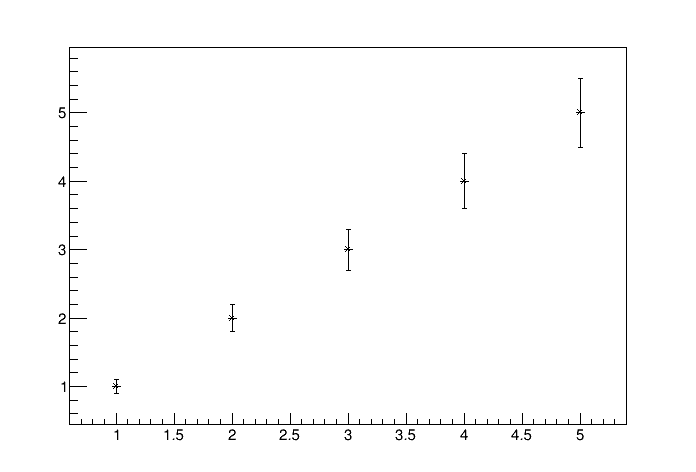

In [104]:
grafico.Draw("A*")
c1.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =  8.08582e-30
NDf                       =            3
p0                        =  2.93662e-16   +/-   0.15414     
p1                        =            1   +/-   0.0833958   


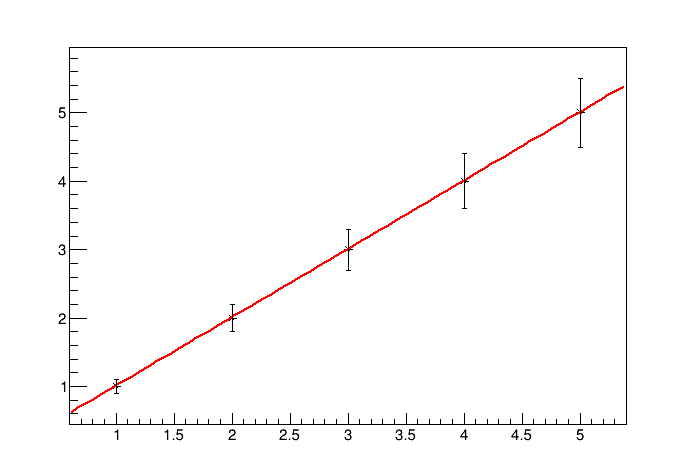

In [105]:
ajuste = ROOT.TF1('ajuste',"pol1",0,5) # Pol1 reta, pol2 parabola
grafico.Fit("ajuste")

grafico.Draw("A*")
c1.Draw()

# Deixando mais bonito

# Criando funções definidas pelo usuário

# Exportando o plot

# Guardando e carregando objetos com TFile

## Guardar 

In [106]:
c = ROOT.TCanvas()
pasta = ROOT.TFile("output/saida.root",'RECREATE')
hist = ROOT.TH1F("hist",'Histograma',100,0,100)
hist.Fill(10)
hist.Fill(90)

pasta.Write()
pasta.Close()


### OBS: Ao executar no terminal pelo root. Colocar "new TBrowser"

## Carregar

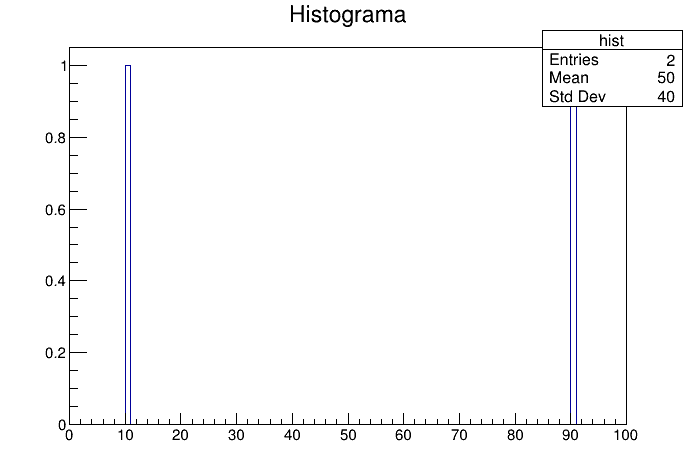

In [107]:
c1 = ROOT.TCanvas()
file = ROOT.TFile("output/saida.root","READ")
hist = file.Get("hist")
hist.Draw()
c1.Draw()
#file.Close()

# TTREE

## Guardando dados com TTRE

In [108]:
df = pd.read_csv("data/data4.txt")
output = ROOT.TFile("output/data4.root",'RECREATE')
tree = ROOT.TTree('tree','tree')

x = array.array("d",df.x.array)
y = array.array("d",df.y.array)

tree.Branch("x",x,"x/D")
tree.Branch("y",y,"y/D")
for i in range(len(df)):
    x[0] = x[i]
    y[0] = y[i]
    tree.Fill()


output.Write()
output.Close()


## Lendo Dados com TTree

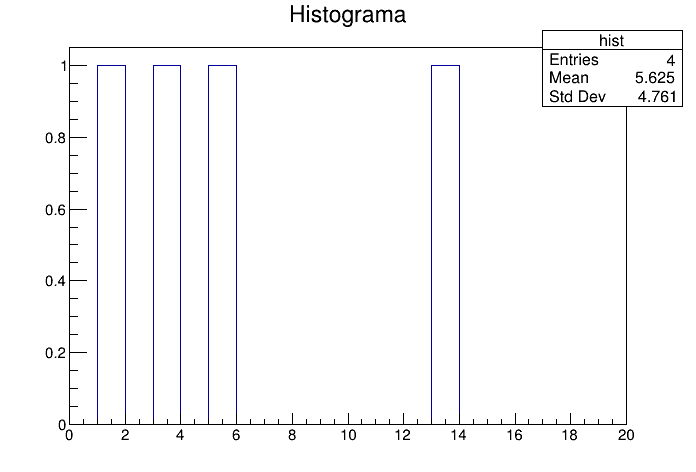

In [109]:
c1 = ROOT.TCanvas()

entrada = ROOT.TFile("output/data4.root",'read')
tree = entrada.Get("tree")

x =  array.array("d",[0.])
y = array.array("d",[0.])
tree.SetBranchAddress("x",x) #"Ponteiro" do TTree
tree.SetBranchAddress("y",y)

hist = ROOT.TH1F("hist",'Histograma',20,0,20)


entradas = tree.GetEntries() # Tamanho da TTree
for i in range(entradas):
    tree.GetEntry(i)
    hist.Fill(x[0])
    
hist.Draw()
c1.Draw()

# RDataFrame

## Implantacao basica

### Basico 

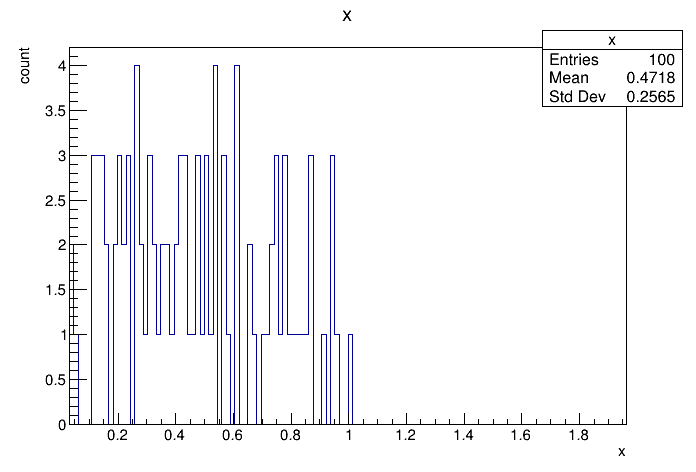

In [110]:
# Criando um dado com 100 linhas 
c = ROOT.TCanvas()
rdf = ROOT.RDataFrame(100)
 
# definindo uma nova coluna, com numeros "aleatorios"
rdf_x = rdf.Define("x", "gRandom->Rndm()") #Define("Nome variavel","Codigo c++")
 

h = rdf_x.Histo1D("x")
h.Draw()
c.Draw()

### Introducao

In [111]:

def fill_tree(treeName, fileName):
    df = ROOT.RDataFrame(10)
    df.Define("b1", "(double) rdfentry_").Define("b2", "(int) rdfentry_ * rdfentry_").Snapshot(treeName, fileName) 

In [112]:
nomepasta = "output/df001_introduction_py.root"
nomeTree = "myTree"
fill_tree(nomeTree, nomepasta)

In [113]:
d = ROOT.RDataFrame(nomeTree, nomepasta) # Criando um RDataFrame

corteb1 = 'b1 < 5.' # o codigo precisa ser c++, e as variaveis tem que ser igual as definidas no df
corteb1b2 = 'b2 % 2 && b1 < 4.'

In [114]:
entries1 = d.Filter(corteb1).Filter(corteb1b2).Count() # Filter = filtro; Count = recupera o numero de entradas do filtro

print('{} Passaram por todos os filtros'.format(entries1.GetValue()))

entries2 = d.Filter("b1 < 5.").Count();
print('{} Passaram por todos os filtros'.format(entries2.GetValue()))

2 Passaram por todos os filtros
5 Passaram por todos os filtros


In [115]:
b1b2_cut = d.Filter(corteb1b2) 
minVal = b1b2_cut.Min('b1') # Minimo 
maxVal = b1b2_cut.Max('b1') # Maximo
meanVal = b1b2_cut.Mean('b1') # Media
nonDefmeanVal = b1b2_cut.Mean("b2") 
print('A média é sempre incluída entre o mínimo e o máximo: {0} <= {1} <= {2}'.format(minVal.GetValue(), meanVal.GetValue(), maxVal.GetValue()))

A média é sempre incluída entre o mínimo e o máximo: 1.0 <= 2.0 <= 3.0


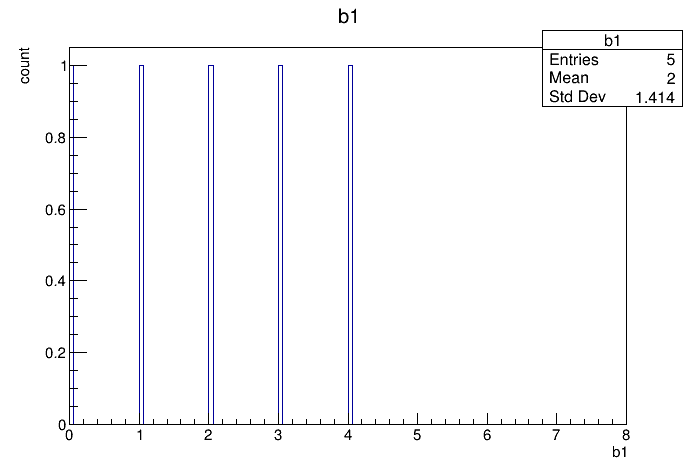

In [116]:
c = ROOT.TCanvas()
hist = d.Filter(corteb1).Histo1D('b1') # colocando em um hist TH1F
hist.Draw()
c.Draw()


## Modelo de dados

In [117]:
#Criando um Tree test
fill_tree_code = '''
using FourVector = ROOT::Math::XYZTVector;
using FourVectorVec = std::vector<FourVector>;
using CylFourVector = ROOT::Math::RhoEtaPhiVector;

void fill_tree(const char *filename, const char *treeName)
{
   const double M = 0.13957; // set pi+ mass
   TRandom3 R(1);

   auto genTracks = [&](){
      FourVectorVec tracks;
      const auto nPart = R.Poisson(15);
      tracks.reserve(nPart);
      for (int j = 0; j < nPart; ++j) {
         const auto px = R.Gaus(0, 10);
         const auto py = R.Gaus(0, 10);
         const auto pt = sqrt(px * px + py * py);
         const auto eta = R.Uniform(-3, 3);
         const auto phi = R.Uniform(0.0, 2 * TMath::Pi());
         CylFourVector vcyl(pt, eta, phi);
         // set energy
         auto E = sqrt(vcyl.R() * vcyl.R() + M * M);
         // fill track vector
         tracks.emplace_back(vcyl.X(), vcyl.Y(), vcyl.Z(), E);
      }
      return tracks;
   };

   ROOT::RDataFrame d(64);
   d.Define("tracks", genTracks).Snapshot<FourVectorVec>(treeName, filename, {"tracks"});
}
'''

In [118]:
fileName = "output/df002_dataModel_py.root"
treeName = "myTree"
ROOT.gInterpreter.Declare(fill_tree_code)
ROOT.fill_tree(fileName, treeName)

input_line_304:6:6: error: redefinition of 'fill_tree'
void fill_tree(const char *filename, const char *treeName)
     ^
input_line_265:6:6: note: previous definition is here
void fill_tree(const char *filename, const char *treeName)
     ^


In [119]:
df = ROOT.RDataFrame(treeName, fileName)

In [120]:
n_cut = 'tracks.size() > 8'
nentries = df.Filter(n_cut).Count();

print('{0} Eventos passados pelo filtro'.format(nentries.GetValue()))

62 Eventos passados pelo filtro


### Criando uma nova coluna com os momentos transversal

In [121]:
getPt_code ='''
using namespace ROOT::VecOps;
ROOT::RVecD getPt(const RVec<FourVector> &tracks)
{
   auto pt = [](const FourVector &v) { return v.pt(); };
   return Map(tracks, pt);
}
'''
ROOT.gInterpreter.Declare(getPt_code)

getPtWeights_code ='''
using namespace ROOT::VecOps;
ROOT::RVecD getPtWeights(const RVec<FourVector> &tracks)
{
   auto ptWeight = [](const FourVector &v) { return 1. / v.Pt(); };
   return Map(tracks, ptWeight);
};
'''
ROOT.gInterpreter.Declare(getPtWeights_code)

augmented_d = df.Define('tracks_n', '(int)tracks.size()').Filter('tracks_n > 2').Define('tracks_pts', 'getPt( tracks )')\
              .Define("tracks_pts_weights", 'getPtWeights( tracks )' )

input_line_306:3:13: error: redefinition of 'getPt'
ROOT::RVecD getPt(const RVec<FourVector> &tracks)
            ^
input_line_269:3:13: note: previous definition is here
ROOT::RVecD getPt(const RVec<FourVector> &tracks)
            ^
input_line_307:3:13: error: redefinition of 'getPtWeights'
ROOT::RVecD getPtWeights(const RVec<FourVector> &tracks)
            ^
input_line_270:3:13: note: previous definition is here
ROOT::RVecD getPtWeights(const RVec<FourVector> &tracks)
            ^


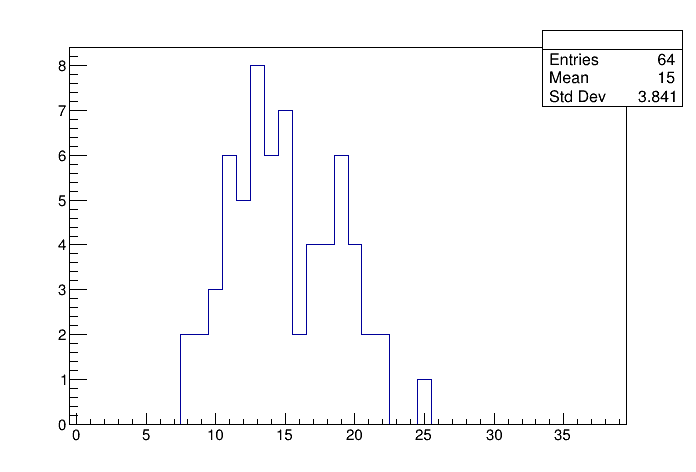

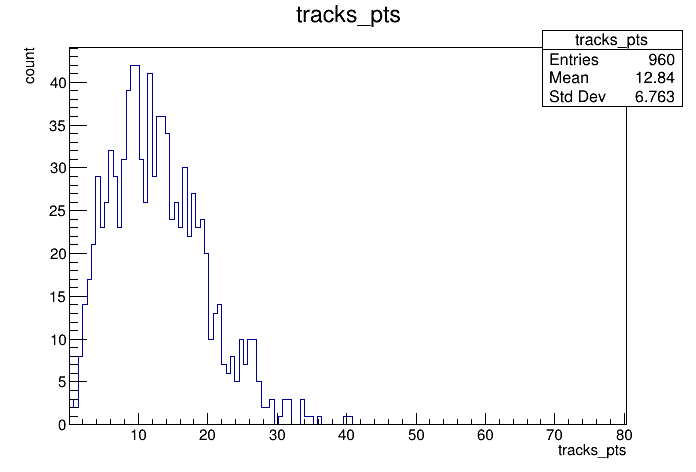

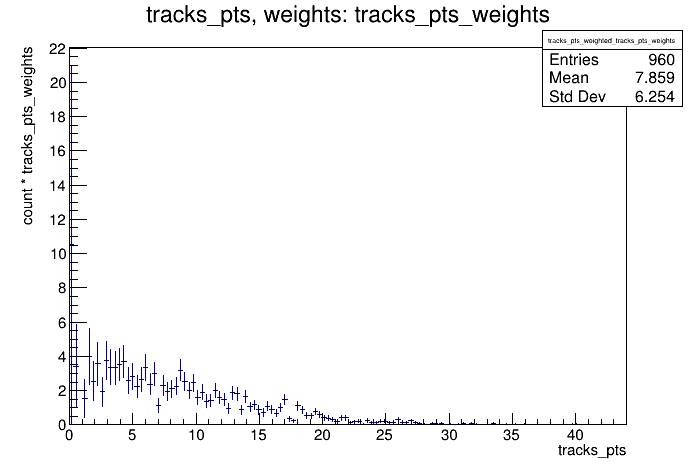

In [122]:
trN = augmented_d.Histo1D(("", "", 40, -.5, 39.5), "tracks_n") # Criando um histograma
trPts = augmented_d.Histo1D("tracks_pts")
trWPts = augmented_d.Histo1D("tracks_pts", "tracks_pts_weights")

c = ROOT.TCanvas()
trN.Draw()
#c.SaveAs("df002_trN.png") Salvar grafico

c1 = ROOT.TCanvas()
trPts.Draw()


c2 = ROOT.TCanvas()
trWPts.Draw()

ROOT.gROOT.GetListOfCanvases().Draw()

## Usando TProfiles com RDataFrame

In [123]:
def fill_tree(treeName, fileName):
    d = ROOT.RDataFrame(25000)
    d.Define("px", "gRandom->Gaus()").Define("py", "gRandom->Gaus()").Define("pz", "sqrt(px * px + py * py)")\
     .Snapshot(treeName, fileName)

In [124]:
fileName = "output/df003_profiles_py.root"
treeName = "myTree"
fill_tree(treeName, fileName)
d = ROOT.RDataFrame(treeName, fileName)
hprof1d = d.Profile1D(("hprof1d", "Profile of pz versus px", 64, -4, 4), "px", "py")
hprof2d = d.Profile2D(("hprof2d", "Profile of pz versus px and py", 40, -4, 4, 40, -4, 4, 0, 20), "px", "py", "pz")

In [126]:
ROOT.gROOT.GetListOfCanvases().Clear()

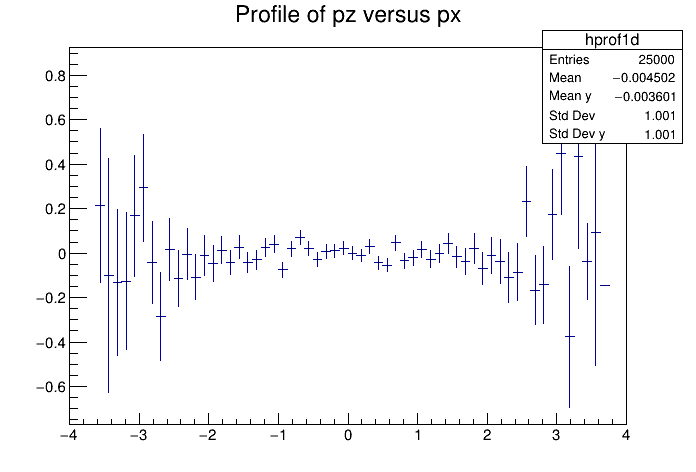

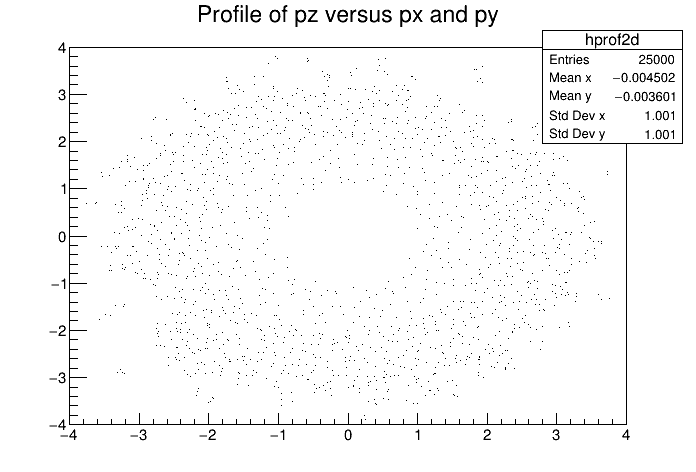

In [127]:
c = ROOT.TCanvas()
hprof1d.Draw()


c1 = ROOT.TCanvas()
hprof2d.Draw()


ROOT.gROOT.GetListOfCanvases().Draw()